In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import numpy as np

%matplotlib inline

In [2]:
import seaborn as sns

BarPlot

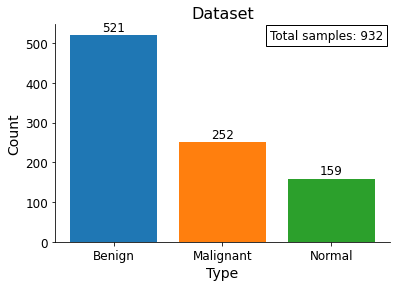

In [3]:
# Data
benign = 521
malignant = 252
normal = 159
total  = benign + malignant + normal

# Create a figure and axis
fig, ax = plt.subplots()

# Create a bar plot
labels = ['Benign', 'Malignant', 'Normal']
values = [benign, malignant, normal]
ax.bar(labels, values, color=['#1f77b4', '#ff7f0e', '#2ca02c'], linewidth=2)

# Set the title and axis labels
ax.set_title('Dataset', fontsize=16)
ax.set_xlabel('Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Set the tick label font size
ax.tick_params(axis='both', labelsize=12)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate each bar with its value
for i, v in enumerate(values):
    ax.text(i, v + 10, str(v), color='black', ha='center', fontsize=12)

# Add a text box with the total number of samples
total_text = ax.text(0.98, 0.98, f'Total samples: {total}', fontsize=12, ha='right', va='top', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=1))

# Display the plot
plt.show()


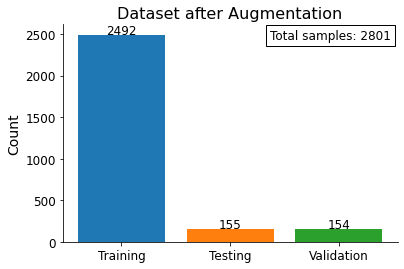

In [4]:
# Data
training = 2492
testing = 155
validation = 154
total  = training + testing + validation

# Create a figure and axis
fig, ax = plt.subplots()

# Create a bar plot
labels = ['Training', 'Testing', 'Validation']
values = [training, testing, validation]
ax.bar(labels, values, color=['#1f77b4', '#ff7f0e', '#2ca02c'], linewidth=2)

# Set the title and axis labels
ax.set_title('Dataset after Augmentation', fontsize=16)
# ax.set_xlabel('', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Set the tick label font size
ax.tick_params(axis='both', labelsize=12)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate each bar with its value
for i, v in enumerate(values):
    ax.text(i, v + 10, str(v), color='black', ha='center', fontsize=12)

# Add a text box with the total number of samples
total_text = ax.text(0.98, 0.98, f'Total samples: {total}', fontsize=12, ha='right', va='top', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=1))

# Display the plot
plt.show()


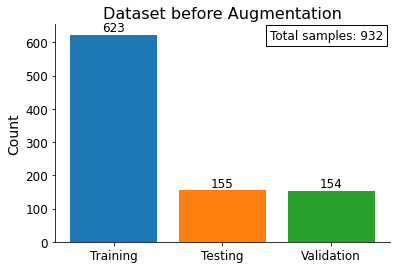

In [5]:
# Data
training = 623
testing = 155
validation = 154
total  = training + testing + validation

# Create a figure and axis
fig, ax = plt.subplots()

# Create a bar plot
labels = ['Training', 'Testing', 'Validation']
values = [training, testing, validation]
ax.bar(labels, values, color=['#1f77b4', '#ff7f0e', '#2ca02c'], linewidth=2)

# Set the title and axis labels
ax.set_title('Dataset before Augmentation', fontsize=16)
# ax.set_xlabel('', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Set the tick label font size
ax.tick_params(axis='both', labelsize=12)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate each bar with its value
for i, v in enumerate(values):
    ax.text(i, v + 10, str(v), color='black', ha='center', fontsize=12)

# Add a text box with the total number of samples
total_text = ax.text(0.98, 0.98, f'Total samples: {total}', fontsize=12, ha='right', va='top', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=1))

# Display the plot
plt.show()


#LeNet

LeNet_With_Augmentation

In [6]:
LeNet_With = pd.read_csv('LeNet_Updated_81.csv')

In [7]:
LeNet_With.columns

Index(['Unnamed: 0', 'Epochs', 'Train loss', 'Valid loss', 'Train acc',
       'Valid acc'],
      dtype='object')

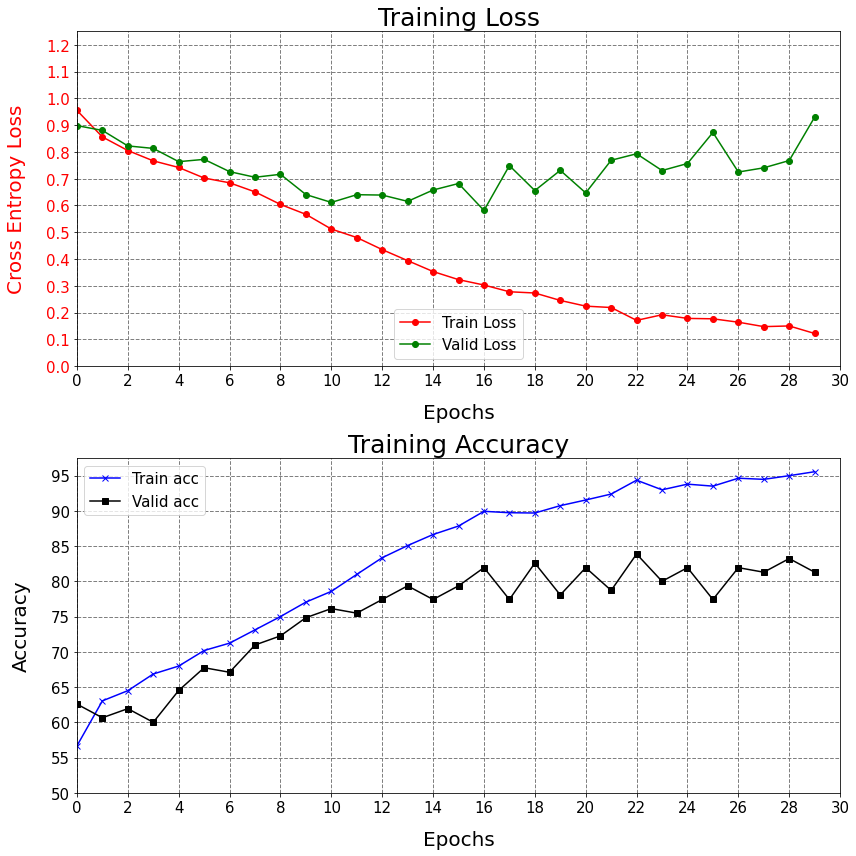

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot for loss
ax1.plot(range(0, 30), LeNet_With['Train loss'], color='red', marker='o', label='Train Loss')
ax1.plot(range(0, 30), LeNet_With['Valid loss'], color='green', marker='o', label='Valid Loss')
ax1.tick_params(axis='y', labelcolor='red', labelsize=15)
ax1.tick_params(axis='x', labelsize=15)
ax1.set_ylim([0, 1.25])
ax1.set_ylabel("Cross Entropy Loss", color='red', fontsize=20, labelpad=20)
ax1.yaxis.set_ticks(np.arange(0, 1.25, .1))
ax1.legend(fontsize=15, loc='lower center')
ax1.grid(axis='both', color='gray', linestyle='--', linewidth=1)
ax1.set_xticks(range(0, 31, 2))
ax1.set_xlim([0, 30])
ax1.set_xlabel("Epochs", fontsize=20, labelpad=15)
ax1.set_title("Training Loss", fontsize=25)

# Plot for accuracy
ax2.plot(range(0, 30), LeNet_With['Train acc'], color='blue', marker='x', label='Train acc')
ax2.plot(range(0, 30), LeNet_With['Valid acc'], color='black', marker='s', label='Valid acc')
ax2.tick_params(axis='both', labelsize=15)
ax2.set_ylabel("Accuracy", color='black', fontsize=20, labelpad=20)
ax2.yaxis.set_ticks(np.arange(50, 100, 5))
ax2.legend(fontsize=15, loc='best')
ax2.grid(axis='both', color='gray', linestyle='--', linewidth=1)
ax2.set_xticks(range(0, 31, 2))
ax2.set_xlim([0, 30])
ax2.set_xlabel("Epochs", fontsize=20, labelpad=15)
ax2.set_title("Training Accuracy", fontsize=25)

# Add a background color to the plots
# ax1.set_facecolor('#f0f0f0')
# ax2.set_facecolor('#f0f0f0')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Fig')

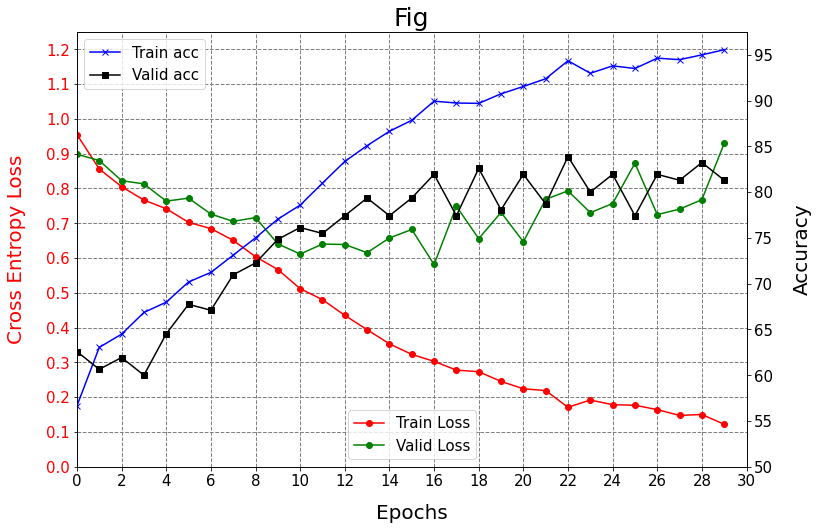

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
a = ax.plot(range(0, 30), LeNet_With['Train loss'], color = 'red', marker = 'o', label ='Train Loss')
d = ax.plot(range(0, 30), LeNet_With['Valid loss'], color = 'green', marker = 'o', label ='Valid Loss')
ax.tick_params(axis = 'y', labelcolor = 'red', labelsize = 15)
ax.tick_params(axis = 'x', labelsize = 15)
ax.set_ylim([0, 1.25])
ax.set_ylabel("Cross Entropy Loss", color = 'red', fontsize = 20, labelpad = 20)
ax.yaxis.set_ticks(np.arange(0, 1.25, .1))

ax1 = ax.twinx()
b = ax1.plot(range(0, 30), LeNet_With['Train acc'], color = 'blue', marker = 'x', label ='Train acc')
c = ax1.plot(range(0, 30), LeNet_With['Valid acc'], color = 'black', marker = 's', label ='Valid acc')
ax1.tick_params(axis = 'both', labelsize = 15)
ax1.set_ylabel("Accuracy", color = 'black', fontsize = 20, labelpad = 20)
ax1.yaxis.set_ticks(np.arange(50, 100, 5))

ax.legend(fontsize = 15, loc = 'lower center')
ax1.legend(fontsize = 15, loc = 'best')

ax.grid(axis = 'both', color = 'gray', linestyle = '--', linewidth = 1)

plt.xticks(range(0, 31, 2));
ax1.set_xlim([0, 30])
ax.set_xlabel("Epochs", fontsize = 20, labelpad = 15)
plt.title("Accuracy VS Loss", fontsize = 25)

# Add a background color to the plot
# ax.set_facecolor('#f0f0f0')
# ax1.set_facecolor('#f0f0f0')


LeNet_Without_Augmentation

In [9]:
LeNet_Without = pd.read_csv('LeNet.csv')

Text(0.5, 0, 'Epochs')

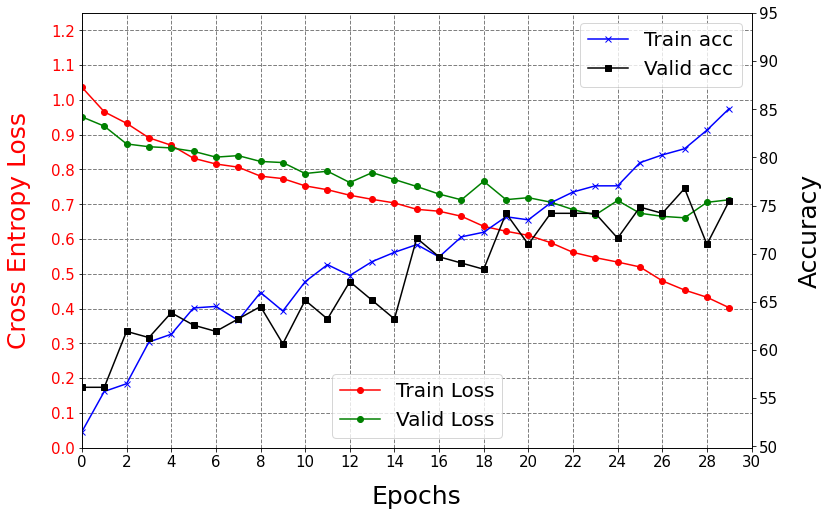

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
a = ax.plot(range(0, 30), LeNet_Without['Train loss'], color = 'red', marker = 'o', label ='Train Loss')
d = ax.plot(range(0, 30), LeNet_Without['Valid loss'], color = 'green', marker = 'o', label ='Valid Loss')
ax.tick_params(axis = 'y', labelcolor = 'red', labelsize = 15)
ax.tick_params(axis = 'x', labelsize = 15)
ax.set_ylim([0, 1.25])
ax.set_ylabel("Cross Entropy Loss", color = 'red', fontsize = 25, labelpad = 20)
ax.yaxis.set_ticks(np.arange(0, 1.25, .1))

ax1 = ax.twinx()
b = ax1.plot(range(0, 30), LeNet_Without['Train acc'], color = 'blue', marker = 'x', label ='Train acc')
c = ax1.plot(range(0, 30), LeNet_Without['Valid acc'], color = 'black', marker = 's', label ='Valid acc')
ax1.tick_params(axis = 'both', labelsize = 15)
ax1.set_ylabel("Accuracy", color = 'black', fontsize = 25, labelpad = 20)
# ax1.set_xlabel("Epochs", color = 'black', fontsize = 25, labelpad = 20)
ax1.yaxis.set_ticks(np.arange(50, 100, 5))


ax.legend(fontsize = 20, loc = 'lower center')
ax1.legend(fontsize = 20, loc = 'best')

ax.grid(axis = 'both', color = 'gray', linestyle = '--', linewidth = 1)
# ax1.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xticks(range(0, 31, 2));
ax1.set_xlim([0, 30])
ax.set_xlabel("Epochs", fontsize = 25, labelpad = 15)



#VGG16

VGG16_With_Augmentation

In [13]:
VGG16_With = pd.read_csv('VGG16_85.csv')

Text(0.5, 0, 'Epochs')

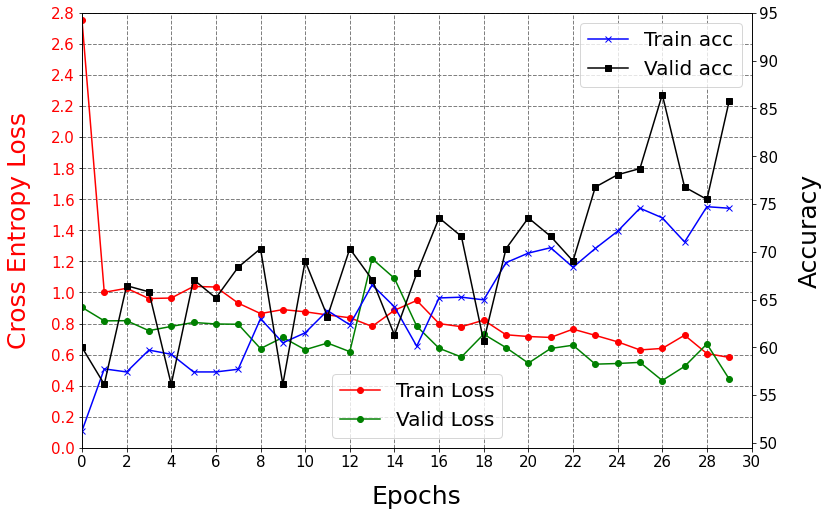

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
a = ax.plot(range(0, 30), VGG16_With['Train loss'], color = 'red', marker = 'o', label ='Train Loss')
d = ax.plot(range(0, 30), VGG16_With['Valid loss'], color = 'green', marker = 'o', label ='Valid Loss')
ax.tick_params(axis = 'y', labelcolor = 'red', labelsize = 15)
ax.tick_params(axis = 'x', labelsize = 15)
ax.set_ylim([0, 1.25])
ax.set_ylabel("Cross Entropy Loss", color = 'red', fontsize = 25, labelpad = 20)
ax.yaxis.set_ticks(np.arange(0, 3, .2))

ax1 = ax.twinx()
b = ax1.plot(range(0, 30), VGG16_With['Train acc'], color = 'blue', marker = 'x', label ='Train acc')
c = ax1.plot(range(0, 30), VGG16_With['Valid acc'], color = 'black', marker = 's', label ='Valid acc')
ax1.tick_params(axis = 'both', labelsize = 15)
ax1.set_ylabel("Accuracy", color = 'black', fontsize = 25, labelpad = 20)
# ax1.set_xlabel("Epochs", color = 'black', fontsize = 25, labelpad = 20)
ax1.yaxis.set_ticks(np.arange(50, 100, 5))


ax.legend(fontsize = 20, loc = 'lower center')
ax1.legend(fontsize = 20, loc = 'best')

ax.grid(axis = 'both', color = 'gray', linestyle = '--', linewidth = 1)
# ax1.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xticks(range(0, 31, 2));
ax1.set_xlim([0, 30])
ax.set_xlabel("Epochs", fontsize = 25, labelpad = 15)

# # Add a background color to the plot
# ax.set_facecolor('#f0f0f0')
# ax1.set_facecolor('#f0f0f0')


VGG16_Without_Augmentation

In [15]:
VGG16_Without = pd.read_csv('VGG16.csv')

Text(0.5, 0, 'Epochs')

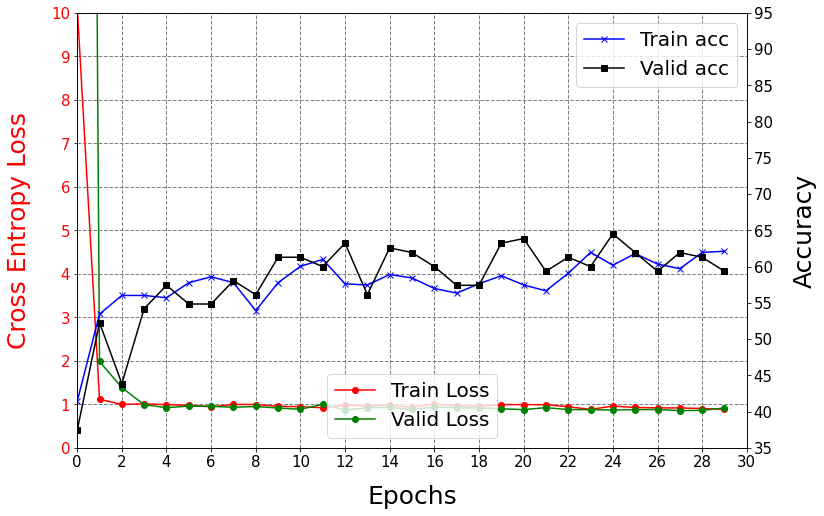

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
a = ax.plot(range(0, 30), VGG16_Without['Train loss'], color = 'red', marker = 'o', label ='Train Loss')
d = ax.plot(range(0, 30), VGG16_Without['Valid loss'], color = 'green', marker = 'o', label ='Valid Loss')
ax.tick_params(axis = 'y', labelcolor = 'red', labelsize = 15)
ax.tick_params(axis = 'x', labelsize = 15)
ax.set_ylim([0, 1.25])
ax.set_ylabel("Cross Entropy Loss", color = 'red', fontsize = 25, labelpad = 20)
ax.yaxis.set_ticks(np.arange(0, 11, 1))

ax1 = ax.twinx()
b = ax1.plot(range(0, 30), VGG16_Without['Train acc'], color = 'blue', marker = 'x', label ='Train acc')
c = ax1.plot(range(0, 30), VGG16_Without['Valid acc'], color = 'black', marker = 's', label ='Valid acc')
ax1.tick_params(axis = 'both', labelsize = 15)
ax1.set_ylabel("Accuracy", color = 'black', fontsize = 25, labelpad = 20)
ax1.yaxis.set_ticks(np.arange(35, 100, 5))


ax.legend(fontsize = 20, loc = 'lower center')
ax1.legend(fontsize = 20, loc = 'best')

ax.grid(axis = 'both', color = 'gray', linestyle = '--', linewidth = 1)
# ax1.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xticks(range(0, 31, 2));
ax1.set_xlim([0, 30])
ax.set_xlabel("Epochs", fontsize = 25, labelpad = 15)

# # Add a background color to the plot
# ax.set_facecolor('#f0f0f0')
# ax1.set_facecolor('#f0f0f0')


#ResNet50

ResNet50_With_Augmentation

In [17]:
ResNet50_With = pd.read_csv('ResNet50_88.csv')

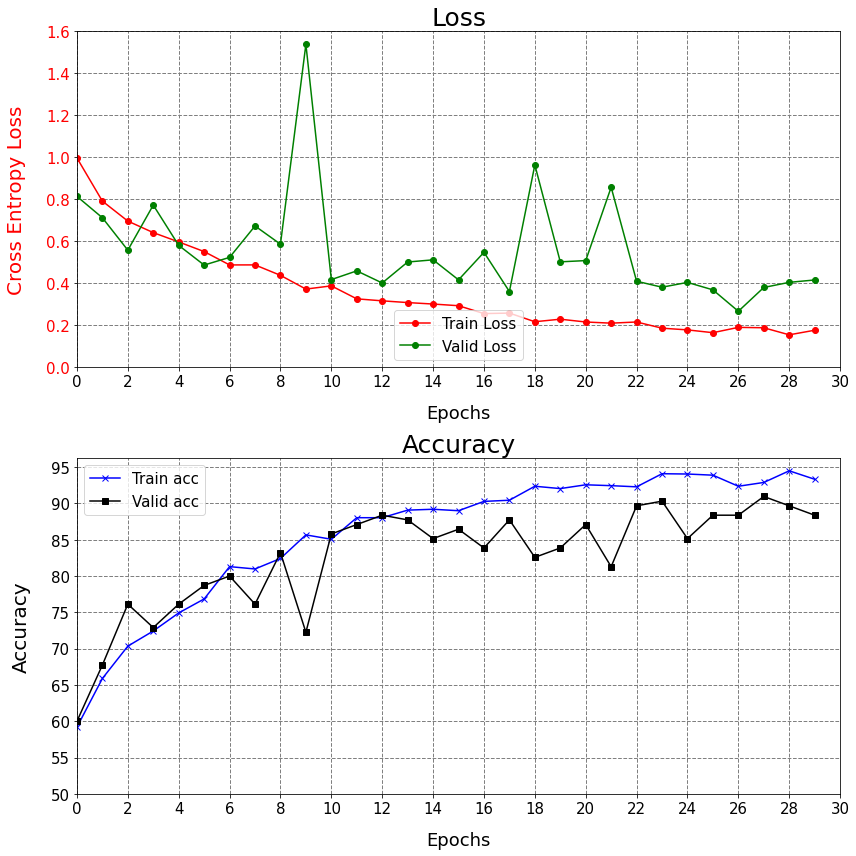

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot for loss
ax1.plot(range(0, 30), ResNet50_With['Train loss'], color='red', marker='o', label='Train Loss')
ax1.plot(range(0, 30), ResNet50_With['Valid loss'], color='green', marker='o', label='Valid Loss')
ax1.tick_params(axis='y', labelcolor='red', labelsize=15)
ax1.tick_params(axis='x', labelsize=15)
ax1.set_ylim([0, 1.25])
ax1.set_ylabel("Cross Entropy Loss", color='red', fontsize=20, labelpad=20)
ax1.yaxis.set_ticks(np.arange(0, 1.8, .2))
ax1.legend(fontsize=15, loc='lower center')
ax1.grid(axis='both', color='gray', linestyle='--', linewidth=1)
ax1.set_xticks(range(0, 31, 2))
ax1.set_xlim([0, 30])
ax1.set_xlabel("Epochs", fontsize=18, labelpad=15)
ax1.set_title("Loss", fontsize=25)

# Plot for accuracy
ax2.plot(range(0, 30), ResNet50_With['Train acc'], color='blue', marker='x', label='Train acc')
ax2.plot(range(0, 30), ResNet50_With['Valid acc'], color='black', marker='s', label='Valid acc')
ax2.tick_params(axis='both', labelsize=15)
ax2.set_ylabel("Accuracy", color='black', fontsize=20, labelpad=20)
ax2.yaxis.set_ticks(np.arange(50, 100, 5))
ax2.legend(fontsize=15, loc='best')
ax2.grid(axis='both', color='gray', linestyle='--', linewidth=1)
ax2.set_xticks(range(0, 31, 2))
ax2.set_xlim([0, 30])
ax2.set_xlabel("Epochs", fontsize=18, labelpad=15)
ax2.set_title("Accuracy", fontsize=25)

# Add a background color to the plots
# ax1.set_facecolor('#f0f0f0')
# ax2.set_facecolor('#f0f0f0')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Loss Vs Accuracy in each Epochs')

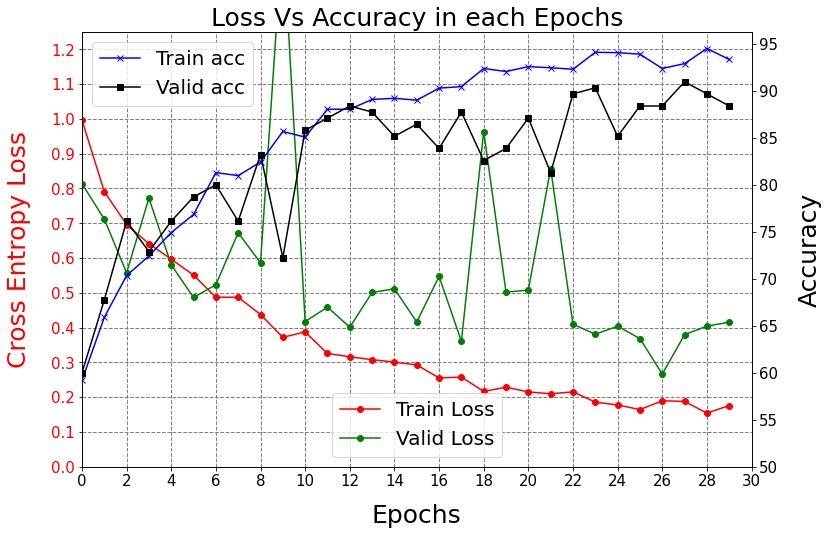

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
a = ax.plot(range(0, 30), ResNet50_With['Train loss'], color = 'red', marker = 'o', label ='Train Loss')
d = ax.plot(range(0, 30), ResNet50_With['Valid loss'], color = 'green', marker = 'o', label ='Valid Loss')
ax.tick_params(axis = 'y', labelcolor = 'red', labelsize = 15)
ax.tick_params(axis = 'x', labelsize = 15)
ax.set_ylim([0, 1.25])
ax.set_ylabel("Cross Entropy Loss", color = 'red', fontsize = 25, labelpad = 20)
ax.yaxis.set_ticks(np.arange(0, 1.25, .1))

ax1 = ax.twinx()
b = ax1.plot(range(0, 30), ResNet50_With['Train acc'], color = 'blue', marker = 'x', label ='Train acc')
c = ax1.plot(range(0, 30), ResNet50_With['Valid acc'], color = 'black', marker = 's', label ='Valid acc')
ax1.tick_params(axis = 'both', labelsize = 15)
ax1.set_ylabel("Accuracy", color = 'black', fontsize = 25, labelpad = 20)
ax1.yaxis.set_ticks(np.arange(50, 100, 5))


ax.legend(fontsize = 20, loc = 'lower center')
ax1.legend(fontsize = 20, loc = 'best')

ax.grid(axis = 'both', color = 'gray', linestyle = '--', linewidth = 1)
# ax1.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xticks(range(0, 31, 2));
ax1.set_xlim([0, 30])
ax.set_xlabel("Epochs", fontsize = 25, labelpad = 15)
plt.title("Loss Vs Accuracy in each Epochs", fontsize = 25)

# # Add a background color to the plot
# ax.set_facecolor('#f0f0f0')
# ax1.set_facecolor('#f0f0f0')


ResNet50_Without_Augmentation

In [19]:
ResNet50_Without = pd.read_csv('ResNet50_78.csv')

Text(0.5, 0, 'Epochs')

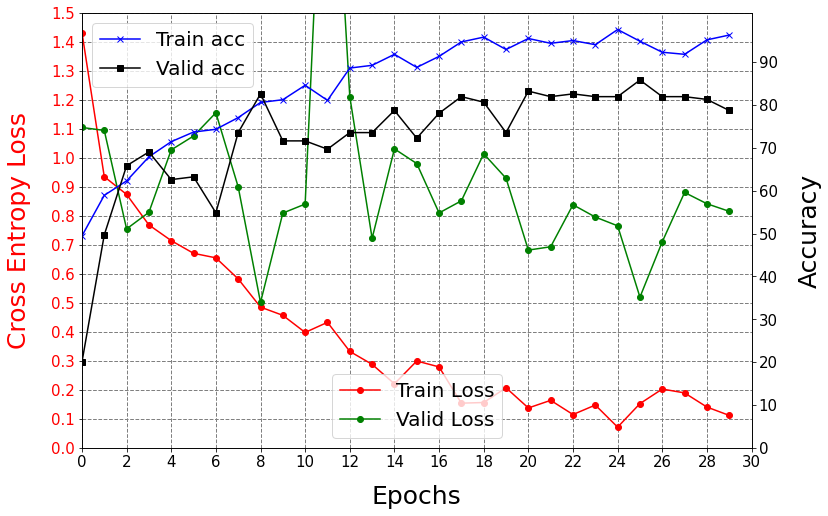

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
a = ax.plot(range(0, 30), ResNet50_Without['Train loss'], color = 'red', marker = 'o', label ='Train Loss')
d = ax.plot(range(0, 30), ResNet50_Without['Valid loss'], color = 'green', marker = 'o', label ='Valid Loss')
ax.tick_params(axis = 'y', labelcolor = 'red', labelsize = 15)
ax.tick_params(axis = 'x', labelsize = 15)
ax.set_ylim([0, 1.25])
ax.set_ylabel("Cross Entropy Loss", color = 'red', fontsize = 25, labelpad = 20)
ax.yaxis.set_ticks(np.arange(0, 1.6, .1))

ax1 = ax.twinx()
b = ax1.plot(range(0, 30), ResNet50_Without['Train acc'], color = 'blue', marker = 'x', label ='Train acc')
c = ax1.plot(range(0, 30), ResNet50_Without['Valid acc'], color = 'black', marker = 's', label ='Valid acc')
ax1.tick_params(axis = 'both', labelsize = 15)
ax1.set_ylabel("Accuracy", color = 'black', fontsize = 25, labelpad = 20)
ax1.yaxis.set_ticks(np.arange(0, 100, 10))


ax.legend(fontsize = 20, loc = 'lower center')
ax1.legend(fontsize = 20, loc = 'best')

ax.grid(axis = 'both', color = 'gray', linestyle = '--', linewidth = 1)
# ax1.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xticks(range(0, 31, 2));
ax1.set_xlim([0, 30])
ax.set_xlabel("Epochs", fontsize = 25, labelpad = 15)

# # Add a background color to the plot
# ax.set_facecolor('#f0f0f0')
# ax1.set_facecolor('#f0f0f0')


#Accuracy Before Vs After

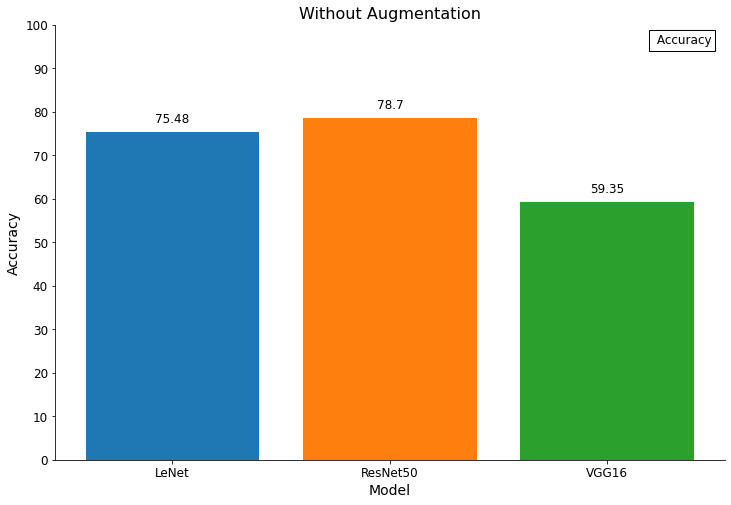

In [7]:
# Data
LeNet = 75.48
ResNet50 = 78.70
VGG16 = 59.35
# total  = benign + malignant + normal

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create a bar plot
labels = ['LeNet', 'ResNet50', 'VGG16']
values = [LeNet, ResNet50, VGG16]
ax.bar(labels, values, color=['#1f77b4', '#ff7f0e', '#2ca02c'], linewidth=2)

# Set the title and axis labels
ax.set_title('Without Augmentation', fontsize=16)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.yaxis.set_ticks(np.arange(0, 110, 10))

# Set the tick label font size
ax.tick_params(axis='both', labelsize=12)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate each bar with its value
for i, v in enumerate(values):
    ax.text(i, v + 2, str(v), color='black', ha='center', fontsize=12)

# Add a text box with the total number of samples
total_text = ax.text(0.98, 0.98, f' Accuracy', fontsize=12, ha='right', va='top', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=1))

# Display the plot
plt.show()


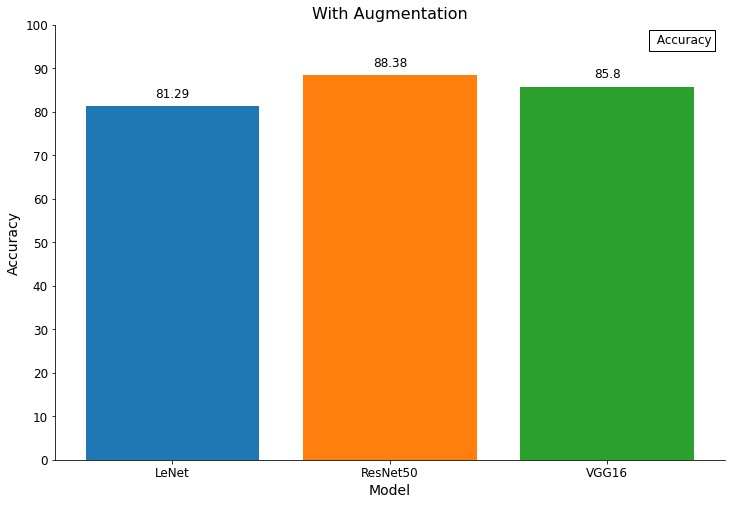

In [8]:
# Data
LeNet = 81.29
ResNet50 = 88.38
VGG16 = 85.80
# total  = benign + malignant + normal

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create a bar plot
labels = ['LeNet', 'ResNet50', 'VGG16']
values = [LeNet, ResNet50, VGG16]
ax.bar(labels, values, color=['#1f77b4', '#ff7f0e', '#2ca02c'], linewidth=2)

# Set the title and axis labels
ax.set_title('With Augmentation', fontsize=16)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.yaxis.set_ticks(np.arange(0, 110, 10))

# Set the tick label font size
ax.tick_params(axis='both', labelsize=12)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate each bar with its value
for i, v in enumerate(values):
    ax.text(i, v + 2, str(v), color='black', ha='center', fontsize=12)

# Add a text box with the total number of samples
total_text = ax.text(0.98, 0.98, f' Accuracy', fontsize=12, ha='right', va='top', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=1))

# Display the plot
plt.show()


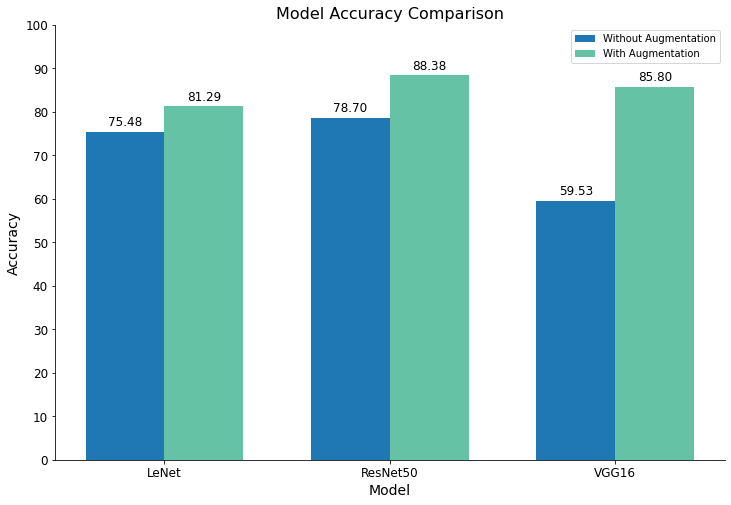

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn color palette
sns.set_palette("Set2")

# Data without augmentation
labels = ['LeNet', 'ResNet50', 'VGG16']
values_without_augmentation = [75.48, 78.70, 59.53]

# Data with augmentation
values_with_augmentation = [81.29, 88.38, 85.80]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create bar plots for both sets of data
width = 0.35
x = np.arange(len(labels))

# Plot without augmentation
rects1 = ax.bar(x - width/2, values_without_augmentation, width, label='Without Augmentation',color='#1f77b4', linewidth=2)

# Plot with augmentation
rects2 = ax.bar(x + width/2, values_with_augmentation, width, label='With Augmentation', linewidth=2)

# Set the title and axis labels
ax.set_title('Model Accuracy Comparison', fontsize=16)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.yaxis.set_ticks(np.arange(0, 110, 10))

# Set the tick label font size
ax.tick_params(axis='both', labelsize=12)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate each bar with its value
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom', fontsize=12)

autolabel(rects1)
autolabel(rects2)

# Label the x-axis with model names
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Add a legend
ax.legend()

# Display the plot
plt.show()
